## M = ?: Monogamy vs. polygamy? 

#### cases we have right now: 
1. #[1:1 < NO < 1:2 == 0 < 0.41 < 0.82]
2. [1:1 < 1:2 < NO == 1 < 0.82 < 0.9
3. [NO < 1:1 < 1:2 == 0.90 < 0.978 = 0.98]
4. [1:2 < NO < 1:1 == 0.5 < 0.54 = 0.78]

---

Usually have many more control units than treated units

Explain 1:1 vs. M:1

Why would you ever want to go the extra mile of matching with multiple people?

Explain

Bigger sample size

Bias-variance tradeoff

Matching can happen with not only people but also countries, etc. 

Give 1-2 successful policy examples?

Discuss norm


<br> 
What is our hypothesis?

M =1 can provide better matching on covariates if the matches are far

Higher M -> reduce variance 

If distribution is scarce and scattered, any single match = bad, multiple matches = much better

Equal terribleness but in different directions = better match

Reduce variance of matched controls

When include more dimensions i.e. covariates, problem even more pronounced: higher likelihood of having bad matches

Vini’s drawing with circle 
- Include in our paper


## Data (self-constructed) exploration

In [52]:
# Load relevant libraries
library(Matching)

### Dataset 1A (with ties)

In [78]:
# STEP 1. DATA SIMULATING/WRANGLING
age <- c(18, 20, 22, 25, 28)
tr <- c(0,1,0, 1, 0)
data <- cbind(age, tr)


In [79]:
# M = 1 matching
genout_m1<- GenMatch(X = age, Tr = tr, M=1, pop.size=200, max.generations=10, wait.generations=25)
matchout_m1 <- Match(X = age, Tr = tr, M=1, Weight.matrix=genout_m1)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~age, match.out = matchout_m1, data = data)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Sun Dec  8 03:15:50 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........       22.5 	 	       22.5 
mean control..........     22.667 	 	       22.5 
std mean diff.........     -4.714 	 	          0 

mean raw eQQ diff.....        2.5 	 	        2.5 
med  raw eQQ diff.....        2.5 	 	        2.5 
max  raw eQQ diff.....          3 	 	          3 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....    0.49342 	 	     0.4902 
T-test p-value........    0.96815 	 	          1 
KS Bootstrap p-value..      0.932 	 	      0.982 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.932

[1] 0.982

#### What's going on? 1:1 matching is better than no matching: [NO < 1:1 == 0.93 < 0.98]

In [80]:
# M=2 matching
genout_m2<- GenMatch(X = age, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25)

matchout_m2 <- Match(X = age, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~age, match.out = matchout_m2, data = data)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Sun Dec  8 03:16:03 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........       22.5 	 	       22.5 
mean control..........     22.667 	 	       22.5 
std mean diff.........     -4.714 	 	          0 

mean raw eQQ diff.....        2.5 	 	        2.5 
med  raw eQQ diff.....        2.5 	 	        2.5 
max  raw eQQ diff.....          3 	 	          3 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....    0.49342 	 	     0.4902 
T-test p-value........    0.96815 	 	          1 
KS Bootstrap p-value..      0.916 	 	      0.978 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.916

[1] 0.978

#### What's going on? 1:2 matching is as good as 1:1 matching and they are better than NO matching [NO < 1:1 = 1:2 == 0.91 < 0.982 =0.978]


### Dataset 1B (without ties)

In [85]:
# STEP 1. DATA SIMULATING/WRANGLING
age <- c(20, 20, 20, 20, 20)
tr <- c(0,1,0, 1, 0)
data <- cbind(age, tr)


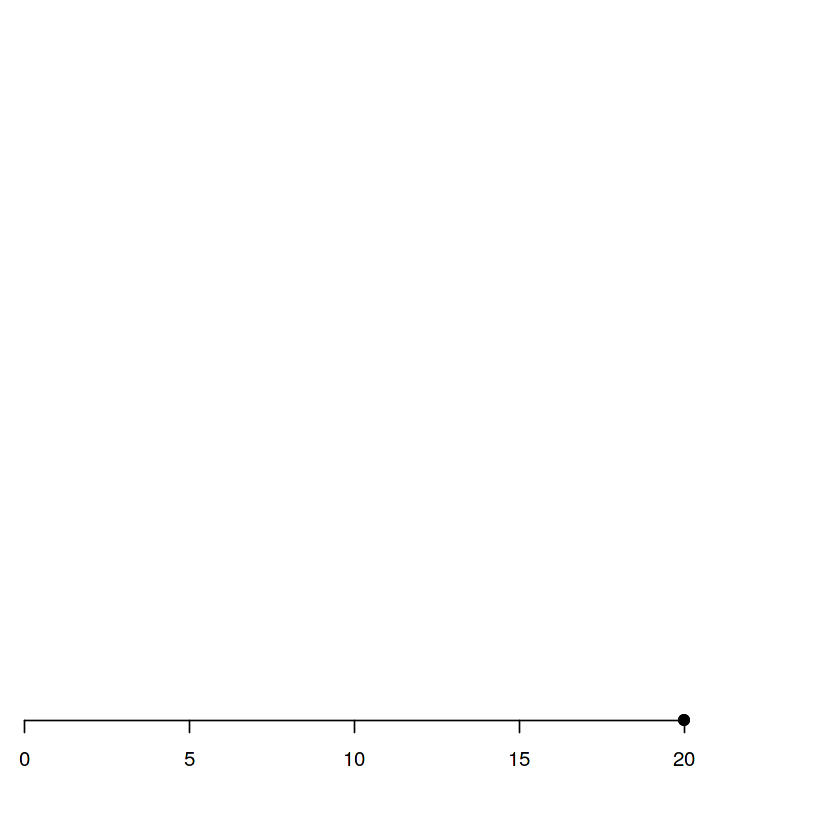

In [86]:
plot_data(age, tr)

In [87]:
# M = 1 matching
genout_m1<- GenMatch(X = age, Tr = tr, M=1, pop.size=200, max.generations=10, wait.generations=25, ties = F)
matchout_m1 <- Match(X = age, Tr = tr, M=1, Weight.matrix=genout_m1, ties = F)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~age, match.out = matchout_m1, data = data)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Sun Dec  8 03:28:53 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 1.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 3 3

[1] 2 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........         20 	 	         20 
mean control..........         20 	 	         20 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........          0 	 	          0 
med  eCDF diff........          0 	 	          0 
max  eCDF diff........          0 	 	          0 

var ratio (Tr/Co).....        NaN 	 	        NaN 
T-test p-value........          1 	 	          1 



[1] 1

[1] 1

#### [1:1 < NO == 0.089 < 0.902]

In [88]:
# M=2 matching
genout_m2<- GenMatch(X = age, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25, ties = F)

matchout_m2 <- Match(X = age, Tr = tr, M=2, Weight.matrix=genout_m2, ties = F)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~age, match.out = matchout_m2, data = data)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Sun Dec  8 03:28:58 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 1.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 1 3

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........         20 	 	         20 
mean control..........         20 	 	         20 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....          0 	 	          0 
med  raw eQQ diff.....          0 	 	          0 
max  raw eQQ diff.....          0 	 	          0 

mean eCDF diff........          0 	 	          0 
med  eCDF diff........          0 	 	          0 
max  eCDF diff........          0 	 	          0 

var ratio (Tr/Co).....        NaN 	 	        NaN 
T-test p-value........          1 	 	          1 



[1] 1

[1] 1

#### [1:1 < NO < 1:2 == 1 < 1 < 1]

---

### Dataset 2

In [53]:
# STEP 1. DATA SIMULATING/WRANGLING
age <- c(17, 20, 22, 25, 27)
tr <- c(0,1,0, 1, 0)
data <- cbind(age, tr)

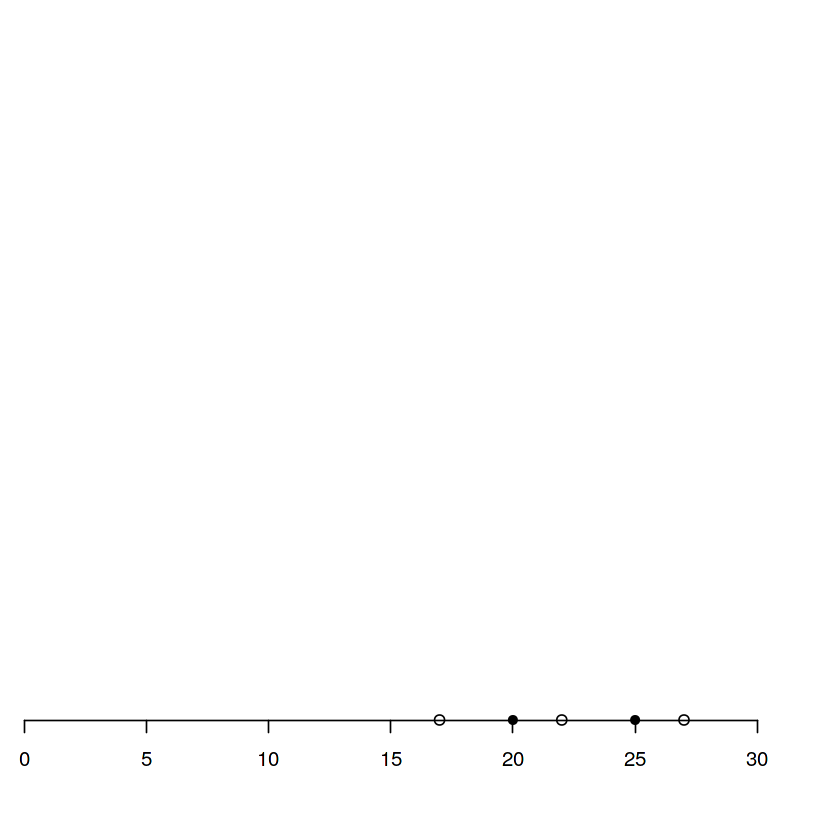

In [54]:
plot_data(age, tr)

In [56]:
#M=1 matching
genout_m1<- GenMatch(X = age, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25)
matchout_m1 <- Match(X = age, Tr = tr, M=1, Weight.matrix=genout_m1)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~age, match.out = matchout_m1, data = data)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value




Sun Dec  8 02:58:10 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 0.000000e+00  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 3 5

[1] 2 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........       22.5 	 	       22.5 
mean control..........         22 	 	       24.5 
std mean diff.........     14.142 	 	    -56.569 

mean raw eQQ diff.....        2.5 	 	          2 
med  raw eQQ diff.....        2.5 	 	          2 
max  raw eQQ diff.....          3 	 	          2 

mean eCDF diff........        0.2 	 	       0.25 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....        0.5 	 	          1 
T-test p-value........    0.90443 	 	 < 2.22e-16 
KS Bootstrap p-value..       0.93 	 	       0.88 
KS Naive p-value......          1 	 	          1 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.9044305

[1] 0

#### What's going on? No matching is better than 1:1 matching [1:1 < NO == 0 < 0.9]

In [57]:
#M=2 matching
genout_m2<- GenMatch(X = age, Tr = tr, M=2)

matchout_m2 <- Match(X = age, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~age, match.out = matchout_m2, data = data)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value


Warning message in GenMatch(X = age, Tr = tr, M = 2):
“The key tuning parameters for optimization were are all left at their default values.  The 'pop.size' option in particular should probably be increased for optimal results.  For details please see the help page and http://sekhon.berkeley.edu/papers/MatchingJSS.pdf”



Sun Dec  8 02:58:21 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	15
	(2) Uniform Mutation.................. 	12
	(3) Boundary Mutation................. 	12
	(4) Non-Uniform Mutation.............. 	12
	(5) Polytope Crossover................ 	12
	(6) Simple Crossover.................. 	12
	(7) Whole Non-Uniform Mutation........ 	12
	(8) Heuristic Crossover............... 	12
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 100
Maximum Nonchanging Generations: 4
Population size       : 100
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 8.245203e-01  9.996333e-01  
#unique......... 100, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........       22.5 	 	       22.5 
mean control..........         22 	 	         22 
std mean diff.........     14.142 	 	     14.142 

mean raw eQQ diff.....        2.5 	 	        2.5 
med  raw eQQ diff.....        2.5 	 	        2.5 
max  raw eQQ diff.....          3 	 	          3 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....        0.5 	 	        0.5 
T-test p-value........    0.90443 	 	    0.82452 
KS Bootstrap p-value..      0.924 	 	      0.974 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.9044305

[1] 0.8245203

#### What's going on? NO matching is better than 1:2 AND 1:1  [1:1 < 1:2 < NO == 1 < 0.82 < 0.9]

---

## Dateset 3

In [58]:
# STEP 1. DATA SIMULATING/WRANGLING
age <- c(18, 20, 22, 24, 26)
tr <- c(0,1,0, 1, 0)
data <- cbind(age, tr)

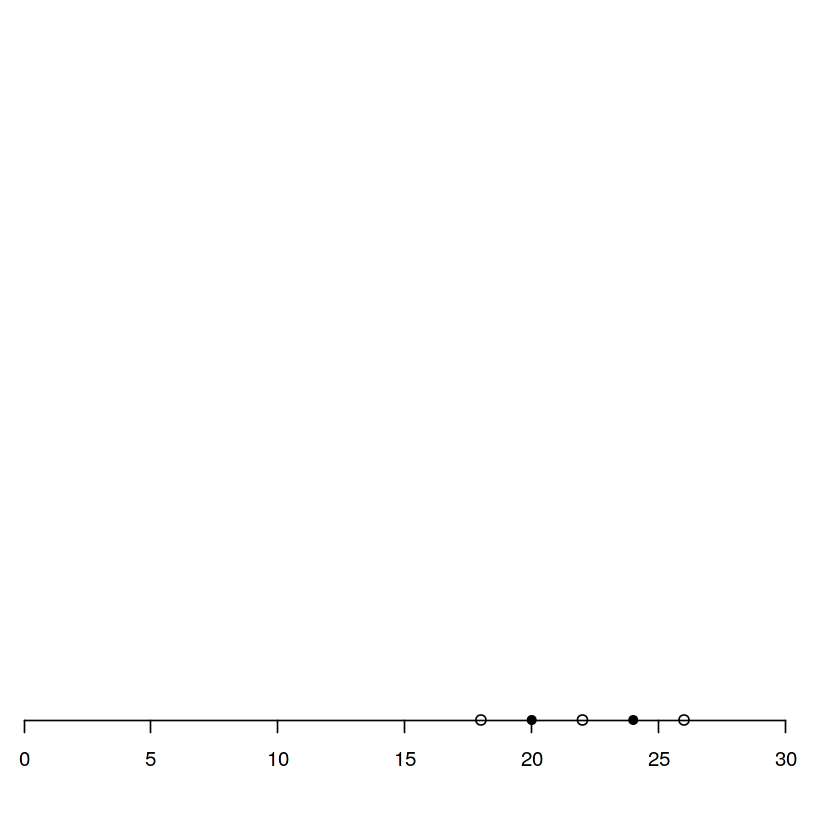

In [59]:
plot_data(age, tr)

In [60]:
#M=1 matching
genout_m1<- GenMatch(X = age, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25)
matchout_m1 <- Match(X = age, Tr = tr, M=1, Weight.matrix=genout_m1)
matchout_m1$index.control
matchout_m1$index.treated
#age <- c(18, 20, 22, 24, 26)
#tr <- c(0,1,0, 1, 0)
#4 pairs

mb.out_m1 <- MatchBalance(tr~age, match.out = matchout_m1)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Sun Dec  8 02:58:35 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........         22 	 	         22 
mean control..........         22 	 	         22 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....          2 	 	          2 
med  raw eQQ diff.....          2 	 	          2 
max  raw eQQ diff.....          2 	 	          2 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....        0.5 	 	        0.5 
T-test p-value........          1 	 	          1 
KS Bootstrap p-value..       0.93 	 	      0.974 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.93

[1] 0.974

#### What's going on? 1:1 is better than no matching [NO < 1:1 == 0.93 < 0.97]

In [61]:
#M=2 matching
genout_m2<- GenMatch(X = age, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25)

matchout_m2 <- Match(X = age, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~age, match.out = matchout_m2)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Sun Dec  8 02:58:49 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.996333e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 1 3 3 5

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........         22 	 	         22 
mean control..........         22 	 	         22 
std mean diff.........          0 	 	          0 

mean raw eQQ diff.....          2 	 	          2 
med  raw eQQ diff.....          2 	 	          2 
max  raw eQQ diff.....          2 	 	          2 

mean eCDF diff........        0.2 	 	        0.2 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	       0.25 

var ratio (Tr/Co).....        0.5 	 	        0.5 
T-test p-value........          1 	 	          1 
KS Bootstrap p-value..      0.932 	 	       0.98 
KS Naive p-value......          1 	 	    0.99963 
KS Statistic..........    0.33333 	 	       0.25 



[1] 0.932

[1] 0.98

#### What's going on? 1:2 is better than 1:1 are equally good and better than NO matching [NO < 1:1 < 1:2 == 0.90 < 0.978 = 0.98]

---

## Dataset 4

In [62]:
# STEP 1. DATA SIMULATING/WRANGLING
age <- c(1, 20, 22, 24,26)
tr <- c(0,1,0, 1, 0)
data <- cbind(age, tr)

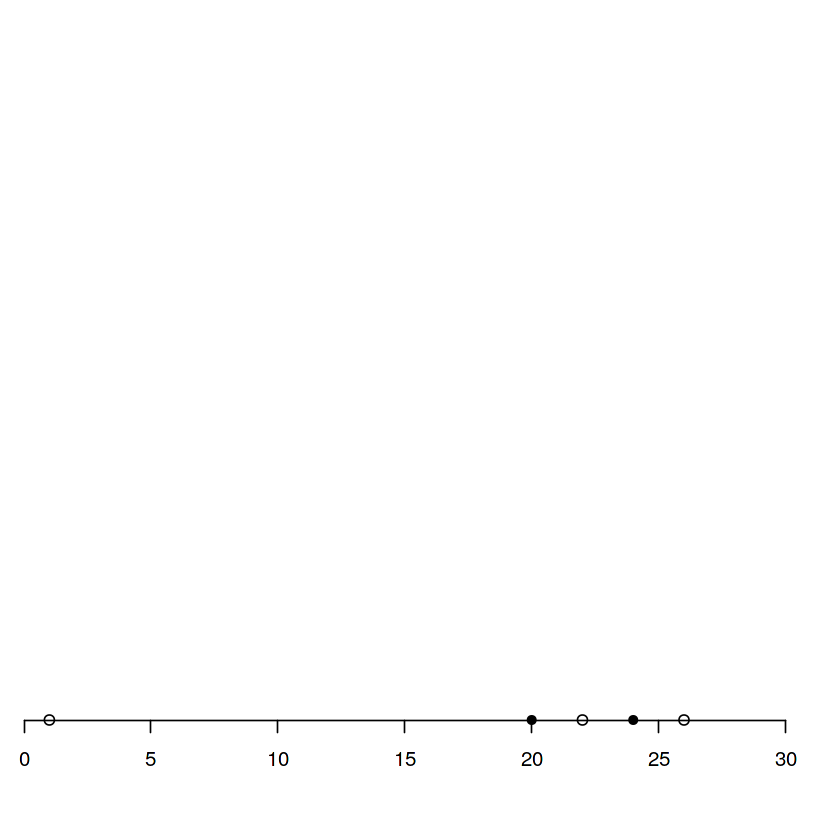

In [63]:
plot_data(age, tr)

In [64]:
#M=1 matching
genout_m1<- GenMatch(X = age, Tr = tr, M=1,  pop.size=200, max.generations=10, wait.generations=25, ties = FALSE)
matchout_m1 <- Match(X = age, Tr = tr, M=1, Weight.matrix=genout_m1, ties = FALSE)
matchout_m1$index.control
matchout_m1$index.treated

mb.out_m1 <- MatchBalance(tr~age, match.out = matchout_m1)
mb.out_m1$BMsmallest.p.value
mb.out_m1$AMsmallest.p.value



Sun Dec  8 03:00:20 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 9.639452e-01  1.000000e+00  
#unique......... 200, #Total UniqueCount:

[1] 3 3

[1] 2 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........         22 	 	         22 
mean control..........     16.333 	 	         22 
std mean diff.........     200.35 	 	          0 

mean raw eQQ diff.....       10.5 	 	          2 
med  raw eQQ diff.....       10.5 	 	          2 
max  raw eQQ diff.....         19 	 	          2 

mean eCDF diff........        0.2 	 	    0.33333 
med  eCDF diff........    0.16667 	 	        0.5 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....   0.044362 	 	        Inf 
T-test p-value........    0.54514 	 	          1 
KS Bootstrap p-value..      0.924 	 	      0.798 
KS Naive p-value......          1 	 	    0.96395 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.5451372

[1] 0.798

In [65]:
#M=2 matching
genout_m2<- GenMatch(X = age, Tr = tr, M=2,  pop.size=200, max.generations=10, wait.generations=25)

matchout_m2 <- Match(X = age, Tr = tr, M=2, Weight.matrix=genout_m2)
matchout_m2$index.control
matchout_m2$index.treated

mb.out_m2 <- MatchBalance(tr~age, match.out = matchout_m2)
mb.out_m2$BMsmallest.p.value
mb.out_m2$AMsmallest.p.value



Sun Dec  8 03:00:22 2019
Domains:
 0.000000e+00   <=  X1   <=    1.000000e+03 

Data Type: Floating Point
Operators (code number, name, population) 
	(1) Cloning........................... 	22
	(2) Uniform Mutation.................. 	25
	(3) Boundary Mutation................. 	25
	(4) Non-Uniform Mutation.............. 	25
	(5) Polytope Crossover................ 	25
	(6) Simple Crossover.................. 	26
	(7) Whole Non-Uniform Mutation........ 	25
	(8) Heuristic Crossover............... 	26
	(9) Local-Minimum Crossover........... 	0

SOFT Maximum Number of Generations: 10
Maximum Nonchanging Generations: 25
Population size       : 200
Convergence Tolerance: 1.000000e-03

Not Using the BFGS Derivative Based Optimizer on the Best Individual Each Generation.
Not Checking Gradients before Stopping.
Using Out of Bounds Individuals.

Maximization Problem.
GENERATION: 0 (initializing the population)
Lexical Fit..... 5.000000e-01  6.993742e-01  
#unique......... 200, #Total UniqueCount:

[1] 3 5 3 5

[1] 2 2 4 4


***** (V1) age *****
                       Before Matching 	 	 After Matching
mean treatment........         22 	 	         22 
mean control..........     16.333 	 	         24 
std mean diff.........     200.35 	 	    -70.711 

mean raw eQQ diff.....       10.5 	 	          2 
med  raw eQQ diff.....       10.5 	 	          2 
max  raw eQQ diff.....         19 	 	          2 

mean eCDF diff........        0.2 	 	       0.25 
med  eCDF diff........    0.16667 	 	       0.25 
max  eCDF diff........    0.33333 	 	        0.5 

var ratio (Tr/Co).....   0.044362 	 	          1 
T-test p-value........    0.54514 	 	        0.5 
KS Bootstrap p-value..      0.912 	 	      0.516 
KS Naive p-value......          1 	 	    0.69937 
KS Statistic..........    0.33333 	 	        0.5 



[1] 0.5451372

[1] 0.5

#### What's going on? 1:1 and 1:1 are equally good and better than NO matching [1:2 < NO < 1:1  == 0.5 < 0.54 = 0.78]

---

## Generalizing (Discussion)

_Include drawings (on axes) to support discussion_
<br>
_Distributions?_

### So, when (which scenarios) does M = 2 matching work better than M = 1 matching? [1:1 < 1:2]
_(Dataset 2 - 1:1 < NO < 1:2)_
<br>
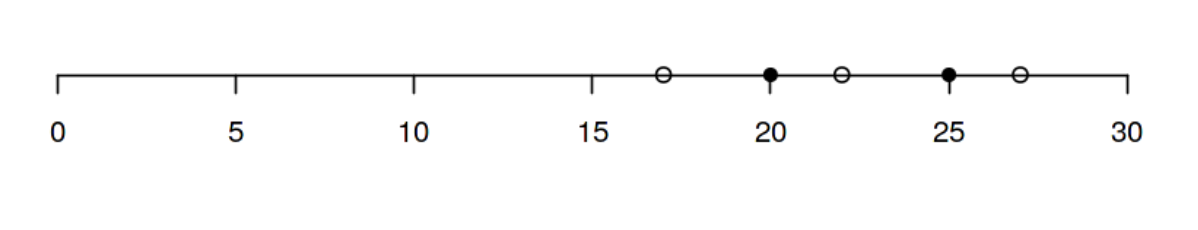
_(Dataset 3 - NO < 1:1 < 1:2)_
<br>
<br>
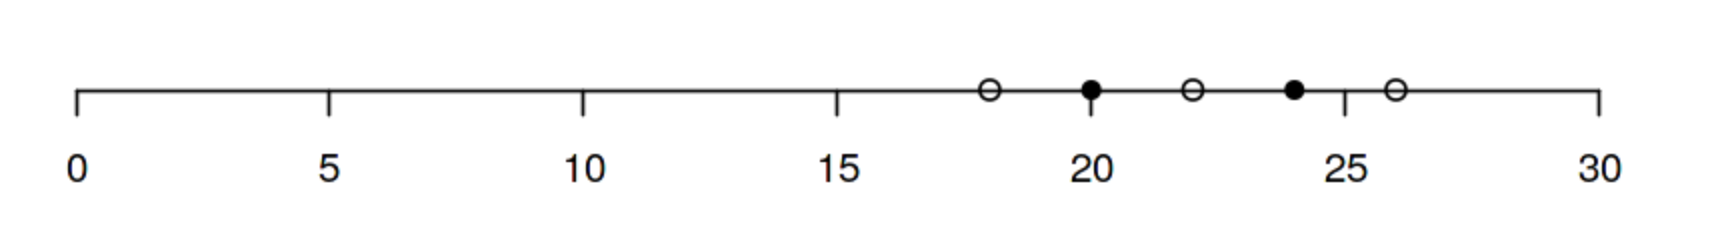

- Control units are equidistant (on both sides) from the control being matched on
    - What does this translate to for distribution graphs?
- Average of selected controls is closer to the treated unit than one control
- Equal terribleness but in different directions = better match
   -  If distribution is scarce and scattered, higher likelihood that any single match = bad, multiple matches = much better
       - When include more dimensions i.e. covariates, problem even more pronounced: higher likelihood of having bad matches

### When (which scenarios) does M = 1 matching work better than M = 2 matching?
_(Dataset 4)_
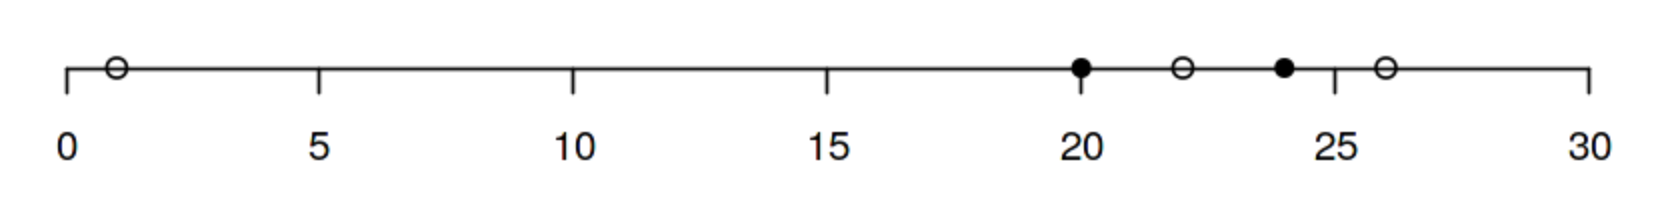

- Exact matches
- No balancing out of chosen control values for treated
- Outliers that need be used for M = 2 matching
- Not enough data around treated


### When (which scenarios) do M = 1 matching and M = 2 matching work as well?
_(Dataset 1A)_


- Exact matches (number of exact matches is the same as specified M) for control (when matching without ties)
- Ties for M = 1; M = 1 == M =2 matching (when matching matching with ties)


## Implications (Conclusion)

- Distributions

- Generalize to multiple matching 

- Extending to multiple dimensions / covariates
    - Simple

- Caliper matching to avoid huge bias  // distance tolerance?
    - Example of (35 + 5) / 2 = 20
    
- Maximumum utilization of a control for treated units (matching WITH replacement)
    - Avoid overuse
    


## Appendix

### Plotting

In [26]:
# create a function called plotting the axes
plot_data <- function(data, assignment) {

    # get values from generated / passed data
    pt_max <- max(data) # find the biggest value
    controls_i <- which(assignment[] == 0) # identify indexes of controls
    controls <- data[controls_i]
    treated_i <- which(assignment[] == 1) # identify indexes of treated
    treated <- data[treated_i]
    
    # define plot data
    xlim <- c(0,pt_max*1.2) # set axis to be slightly bigger than the length of the data 
    ylim <- c(0,100) # ...   

    px_control <- controls # define x-values for control pts
    py_control <- rep(0, length(controls)) # define y-values for control pts (0)
    px_treated <- treated # define x-values for treated pts
    py_treated <- rep(0, length(treated)) # define y-values for treated pts (0)

    # create basic plot outline
    par(xaxs='i',yaxs='i',mar=c(5,1,1,1))
    plot(NA,xlim=xlim,ylim=ylim,axes=F,ann=F)
    axis(1)

    # plot elements
    points(px_control,py_control,xpd=NA)
    points(px_treated,py_treated,pch=16,xpd=NA)
}

## . TO DO : add final control

#### deleted, might be useful:
1:1 < NO 
<br>
Here, when we match one-to-one with or without replacement, we get worse balance than not matching at all (which gives us better results)... Why? Because the control units are not good matches individually (but are better as a group). The control sample is reduced (by two control units -- we don't use them) when we match. 